# Download ZTF lightcurve data set and plot it

In [7]:
# Import packages and modules
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Light curve API Parameters
Filter parameter description can be found at 
[API filters](https://irsa.ipac.caltech.edu/docs/program_interface/ztf_lightcurve_api.html)

In [8]:
# specify API parameters to filter the data
circle_ra = 255.9302 # right acession of the object in the sky
circle_dec = 11.8654 # declination of  the object in  the sky
circle_radius = 0.0028 # circle radius in degrees
filter_band = "r" # observation filter
observation_nums_min = 3 # minimu number of observations
time_range_start = 58194.0 # time in modified julian date
time_range_end = 58483.0
flag_mask = 32768
table_format = "ipac_table"

circle = "POS=CIRCLE"+"+"+str(circle_ra)+"+"+str(circle_dec)+"+"+str(circle_radius)
band = "BANDNAME="+ filter_band
obs = "NOBS_MIN="+str(observation_nums_min)
time_range = "TIME=" + str(time_range_start)+ "+" + str(time_range_end)
mask = "BAD_CATFLAGS_MASK=" + str(flag_mask)
table_format = "FORMAT=" + str(table_format)
params = circle+ "&" + band + "&" + obs + "&" + time_range + "&" + mask + "&" + table_format

url= "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?" + params
print(url)

https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE+255.9302+11.8654+0.0028&BANDNAME=r&NOBS_MIN=3&TIME=58194.0+58483.0&BAD_CATFLAGS_MASK=32768&FORMAT=ipac_table


In [15]:
# download data in a pandas dataframe
header = pd.read_csv(url, header=None, sep='|', skiprows=50,usecols=range(1,25), nrows=1) # extract column names
data = pd.read_csv(url, header=None, delim_whitespace=True, skiprows=55) # extract data
data.columns = header.iloc[0].str.strip()
data.columns

Index(['oid', 'expid', 'hjd', 'mjd', 'mag', 'magerr', 'catflags', 'filtercode',
       'ra', 'dec', 'chi', 'sharp', 'filefracday', 'field', 'ccdid', 'qid',
       'limitmag', 'magzp', 'magzprms', 'clrcoeff', 'clrcounc', 'exptime',
       'airmass', 'programid'],
      dtype='object', name=0)

# Explanation of columm fields
1. **oid** Object ID
1. **expid** Exposure ID
1. **hjd (d)** Heliocentric Julian Date of the midpoint of the exposure (using the mean ra and dec of the input catalog)
1. **mjd (d)** Modified Julian Date of the start of the exposure
1. **mag (mag)** Magnitude
1. **magerr (mag)** Uncertainty in mag measurement. Includes correction to conform to photometric repeatability RMS derived from "non-variable" population.
1. **catflags** Catalog flags for source from PSF-fitting catalog
1. **filtercode** Filter code (abbreviated name)
1. **ra (deg)** Right Ascension of source
1. **dec (deg)** Declination of source
1. **chi** Chi-squared of source
1. **sharp** Sharpness of source
1. **filefracday** Exposure file timestamp, with decimal representation YYYYMMDDdddddd: year, month, day, and fractional day
1. **field** Field ID
1. **ccdid CCD** number (1..16)
1. **qid** Quadrant ID (1..4)
1. **limitmag (mag)** Approximate 5-sigma limiting magnitude corresponding to epoch-based PSF-fit catalog
1.  **magzp (mag)** Magnitude zeropoint from photometric calibration
1. **magzprms (mag)** RMS deviation in magnitude zeropoint
1. **clrcoeff** Color coefficient from linear fit
1. **clrcounc** Color coefficient uncertainty from linear fit
1. **exptime (s)** Exposure time from scheduler
1. **airmass** Airmass at approximately the center of the focal plane at time of exposure
1. **programid** Program ID

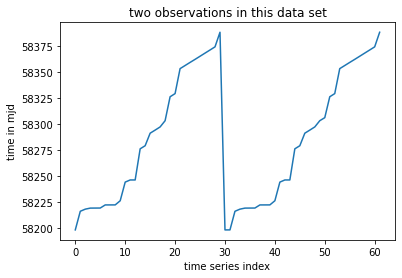

In [16]:
# plot data
# plt.plot(data['mjd'],data['mag'],'.')
plt.plot(range(0,len(data)),data['mjd'])
plt.xlabel('time series index')
plt.ylabel('time in mjd')
plt.title('two observations in this data set')
plt.show()

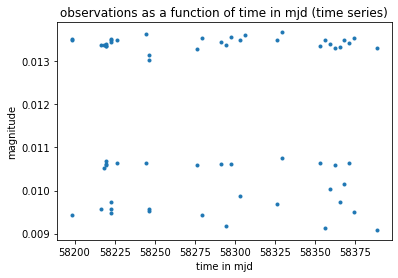

In [17]:
plt.plot(data['mjd'],data['magerr'],'.')
plt.xlabel('time in mjd')
plt.ylabel('magnitude')
plt.title('observations as a function of time in mjd (time series)')
plt.show()

In [18]:
# take mean of data at each time step
data=data.groupby(by=["mjd"]).mean()

In [22]:
data.head(5)
data.columns

Index(['oid', 'expid', 'hjd', 'mag', 'magerr', 'catflags', 'ra', 'dec', 'chi',
       'sharp', 'filefracday', 'field', 'ccdid', 'qid', 'limitmag', 'magzp',
       'magzprms', 'clrcoeff', 'clrcounc', 'exptime', 'airmass', 'programid'],
      dtype='object', name=0)

In [21]:
# explore another section of the dataset
url = 'https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?ID=686103400034440&ID=686103400106565&BAD_CATFLAGS_MASK=32768&FORMAT=ipac_table'
# header = pd.read_csv(url, header=None, sep='|', skiprows=50,usecols=range(1,25), nrows=1) # extract column names
data2 = pd.read_csv(url, header=None, delim_whitespace=True, skiprows=55) # extract data
data2.columns = header.iloc[0].str.strip()
data2.columns
data2.head(5)

,oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,...,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
0,686103400034440,45151402,2.458206e+06,58205.514028,17.660419,0.031985,0,zg,298.002555,29.871463,...,3,4,20.969999,26.307392,0.018130,-0.060876,0.000006,30,1.247,1
1,686103400034440,45251668,2.458207e+06,58206.516690,17.659370,0.031974,0,zg,298.002536,29.871453,...,3,4,20.389999,26.109283,0.018583,-0.060469,0.000006,30,1.222,1
2,686103400034440,45252553,2.458207e+06,58206.525532,17.648050,0.031864,0,zg,298.002556,29.871470,...,3,4,20.740000,26.333904,0.017060,-0.061754,0.000006,30,1.186,1
3,686103400034440,45350884,2.458208e+06,58207.508843,17.632879,0.031717,0,zg,298.002551,29.871461,...,3,4,20.170000,26.335695,0.022384,-0.048380,0.000009,30,1.246,1
4,686103400034440,45451219,2.458209e+06,58208.512199,17.488995,0.030411,0,zg,298.002535,29.871479,...,3,4,19.260000,26.036299,0.033959,-0.007886,0.000020,30,1.218,1
